# Home Credit Indonesia: Credit Score Predicting 

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
from sklearn.metrics import roc_auc_score
# from google.colab import drive

In [2]:
# drive.mount('/content/gdrive')
path = 'D:\Magang\Rakamin & Home Credit Data Science Virtual Internship\week 4\home-credit-default-risk/application_train.csv' 


In [3]:
df_train = pd.read_csv(path) 
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
print('data shape:',df_train.shape)
print('='*100)
print('data columns', df_train.columns)

data shape: (307511, 122)
data columns Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [6]:
df_train.DAYS_REGISTRATION.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: DAYS_REGISTRATION
Non-Null Count   Dtype  
--------------   -----  
307511 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### detecting duplication

In [8]:
print('number of data duplication is:', df_train.duplicated().sum())

number of data duplication is: 0


In [9]:
# MASTIIN LAGI APAKAH ADA NAN DI df_train atau ENGGAK
nan_values = df_train.isna().sum().values

nan_values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202929,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204488,
       214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [10]:
# Menghitung jumlah kolom based on 50% dari values nan_values 

nan_values = list(nan_values)

threshold = 0.5 * 307511  # 50% dari 307511
count = sum(1 for value in nan_values if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 50% dari 307511:", count)
print(threshold)
print('='*100)


indices = [index for index, value in enumerate(nan_values) if value > threshold]
print("Indeks dengan nilai lebih besar dari 50% dari 307511:", indices)

Jumlah nilai kolom yang lebih besar dari 50% dari 307511: 41
153755.5
Indeks dengan nilai lebih besar dari 50% dari 307511: [21, 41, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89]


In [11]:
# df_train.iloc[:, indices]
df_train = df_train.drop(df_train.iloc[:, indices], inplace=True, axis=1)

In [14]:
df_train

# ===================================================================

# Data Preprocessing and Feature Engineering

disini kita akan melakukan proses data preprocessing dan feature engineering yg tujuannya adalah ....,


### Object data type Columns

In [13]:
obj = df_train.dtypes
obj_counts = obj[obj == 'object'].count()
obj_columns = obj[obj == 'object'].index.tolist()

print("Jumlah kolom dengan dtype 'object':", obj_counts)
print('='* 50)
print("Kolom dengan dtype 'object':\n", obj_columns)
print('='* 50)
print('tipe data obj_columns', type(obj_columns))

AttributeError: 'NoneType' object has no attribute 'dtypes'

In [ ]:
df_train[obj_columns].head()

In [ ]:
# mencari berapa banyak value NaN pada tipe data object

print('number of isna detection:')
isna_obj = df_train[obj_columns].isna()
isna_obj.sum()

In [ ]:
lis_kolom = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE','EMERGENCYSTATE_MODE']

for i in lis_kolom:
    all_value_counts = df_train[i].value_counts()
    print('Column\'s name:', i)
    print(all_value_counts)
    print('='*60)
    print()
    

In [ ]:
df_train = df_train.dropna(subset=['NAME_TYPE_SUITE'])
print('total number of NaN value in Name Type Suite column:',df_train['NAME_TYPE_SUITE'].isna().sum())

In [ ]:
# df_train.OCCUPATION_TYPE.isna().sum()  HAPUS 96006
list_OCCUPATION_TYPE = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
                       'High skill tech staff']

df_train['OCCUPATION_TYPE'].fillna(random.choice(list_OCCUPATION_TYPE), inplace=True)

# Cek jumlah nilai NaN setelah pengisian
print('Jumlah NaN values pada kolom ini adalah:',df_train['OCCUPATION_TYPE'].isna().sum())
print('='*80)
print(df_train['OCCUPATION_TYPE'].value_counts())

In [ ]:
def objColumns_and_NaN_object():   # UNTUK MAKE SURE VALUES DARI DATA TYPE OBJECT
    obj = df_train.dtypes
    obj_columns = obj[obj == 'object'].index.tolist()

    print(obj_columns)
    print('='*60)
    print(df_train[obj_columns].isna().sum())

objColumns_and_NaN_object()

In [ ]:
# tri_obj_columns = ['HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# lis_tri_cols = []
                                                #           HAPUSS   HAPUS!!!!!
# for i in tri_obj_columns:
#     tri_columns = df_train[i].unique()         
#     list_tri_columns = list(tri_columns)
#     df_train[i].fillna(random.choice(list_tri_columns), inplace=True)
#     lis_tri_cols.append(list_tri_columns)
    
# lis_tri_cols

In [ ]:
tri_columns = df_train['EMERGENCYSTATE_MODE'].unique()
list_tri_columns = ['Yes', 'No']

df_train['EMERGENCYSTATE_MODE'].fillna(random.choice(list_tri_columns), inplace=True)

df_train.EMERGENCYSTATE_MODE.unique()

In [ ]:
# Cek jumlah nilai NaN setelah pengisian
print('Jumlah NaN values pada kolom emerrgencystate adalah:',df_train['EMERGENCYSTATE_MODE'].isna().sum())
print()
print(df_train['EMERGENCYSTATE_MODE'].value_counts())

In [ ]:
objColumns_and_NaN_object()

In [ ]:
obj = df_train.dtypes
obj_columns = obj[obj == 'object'].index.tolist()
df_train[obj_columns]

In [ ]:
# melihat semua value dari objek columns

for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_train[i].unique()
    print(obj_unique)
    print('='*90)
    

In [ ]:
col = ['CODE_GENDER', 'ORGANIZATION_TYPE']

for i in col:
    val_col = df_train[i].value_counts()
    print(val_col)
    print('='*80)

In [ ]:
col_ORGANIZATION_TYPE = ['Business Entity Type 3','Self-employed','Other', 'Medicine',
                         'Business Entity Type 2','Government','School','Trade: type 7',
                         'Kindergarten', 'Construction','Business Entity Type 1',
                         'Transport: type 4','Trade: type 3', 'Industry: type 9', 'Industry: type 3',
                         'Security', 'Housing','Industry: type 11','Military','Bank']

df_train['ORGANIZATION_TYPE'] = [random.choice(col_ORGANIZATION_TYPE) if x == 'XNA' else x for x in df_train['ORGANIZATION_TYPE']] 


In [ ]:
df_train.ORGANIZATION_TYPE.unique()

In [ ]:
# Menghapus semua elemen dengan value 'XNA' di koom 'CODE_GENDER'

df_train = df_train.dropna(subset=['CODE_GENDER'])

df_train = df_train.drop(df_train[df_train['CODE_GENDER'] == 'XNA'].index)
print('total number of NaN value in CODE GENDER column:',df_train['CODE_GENDER'].isna().sum())

In [ ]:
col = ['CODE_GENDER', 'ORGANIZATION_TYPE']

for i in col:
    val_col = df_train[i].value_counts()
    print(val_col)
    print('='*80)
    
# df_train.ORGANIZATION_TYPE.value_counts()

In [ ]:
#    NANTI KALO MAU DIHAPUS AJA, SOALNYA INI CUMA UNTUK MAKESURE DOANG

objColumns_and_NaN_object()
print()
print('=' *80)
print()
for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_train[i].unique()
    print(obj_unique)
    print('='*90)
    

In [ ]:
df_encoded = pd.get_dummies(df_train[obj_columns])
df_encoded = df_encoded.astype('int')
df_train = pd.concat([df_train, df_encoded], axis=1)

df_train

In [ ]:
# # EXPAND OBJ COLS 

# for i in obj_columns:
#     for elem in df_train[i].unique():
#         df_train[str(elem)] = df_train[i] == elem
        
# df_train.info()

In [ ]:
# booln = df_train.dtypes
# bool_counts = booln[booln == 'bool'].count()
# bool_columns = booln[booln == 'bool'].index.tolist()

# print("Jumlah kolom dengan dtype 'int':", bool_counts)
# print('='* 50)
# print("Kolom dengan dtype 'int':\n", bool_columns)
# print('='* 50)
# print('tipe data obj_columns', type(bool_columns))
# print('='*90)

# for i in bool_columns:
#     print('kolom:', i)
#     bool_unique = df_train[i].unique()
#     print(bool_unique)
#     print('='*90)

In [ ]:
df_train.isna().sum()

## int data type columns

In [ ]:
intg = df_train.dtypes
intg_counts = intg[intg == 'int64'].count()
intg_columns = intg[intg == 'int64'].index.tolist()

print("Jumlah kolom dengan dtype 'int':", intg_counts)
print('='* 50)
print("Kolom dengan dtype 'int':\n", intg_columns)
print('='* 50)
print('tipe data obj_columns', type(intg_columns))

In [ ]:
# HITUNG ISNA DI INT COLUMNS

df_train[intg_columns].isna().sum()

In [ ]:
df_train[intg_columns].head()

In [ ]:
for i in intg_columns:
    print('kolom:', i)
    int_unique = df_train[i].unique()
    print(int_unique)
    print('='*90)
# df_train[intg_columns]

## FLOAT data type columns

In [ ]:
float64 = df_train.dtypes
float64_counts = float64[float64 == 'float64'].count()
float64_columns = float64[float64== 'float64'].index.tolist()

print("Jumlah kolom dengan dtype 'float':", float64_counts)
print('='* 50)
print("Kolom dengan dtype 'float':\n", float64_columns)
print('='* 50)
print('tipe data obj_columns', type(float64_columns))

In [ ]:
# HITUNG ISNA DI float64 COLUMNS

nan_counts_float = df_train[float64_columns].isna().sum()
# df_train[float64_columns].value_counts()
print(nan_counts_float)

In [ ]:
nan_counts = df_train[float64_columns].isna().sum()

def float_counts():
    for col, count in nan_counts.items():
        print(f"{col} = {count} NaN")
        
float_counts()

In [ ]:
# Menghitung jumlah kolom berdasarkan 45% dari values nan_values 

nan_counts = df_train[float64_columns].isna().sum()

lis_float_nan =[]
lis_column_float_nan= []

for col, count in nan_counts.items():
    lis_float_nan.append(count)
    lis_column_float_nan.append(col)

percentage = 0.45
threshold = percentage * 306215  # 50% dari 307511
count = sum(1 for value in lis_float_nan if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 50% dari 307511 sebanyak:", count, ' kolom')
print(f'nilai threshold dari {percentage} adalah = {threshold}')
print('='*100)


indices = [index for index, value in enumerate(lis_float_nan) if value > threshold]
print("Indeks dengan nilai lebih besar dari 45% dari 307511:", indices)


In [ ]:
float_cols_45 = df_train[float64_columns[9:16]]
float_cols_45 = float_cols_45.columns
float_cols_45 = list(float_cols_45)
# float_cols_45

df_train.drop(df_train[float_cols_45], inplace=True, axis=1)

In [ ]:
# # Remove terlebih dahulu beberapa kolom yang memiliki nilai 0 NaN

# col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
#        'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS']

# for x in col:
#     while x in float64_columns:
#         float64_columns.remove(x)
        
# print(float64_columns)

In [ ]:
nan_counts = df_train[float64_columns].isna().sum()

def float_counts():
    for col, count in nan_counts.items():
        print(f"{col} = {count} NaN")
        
float_counts()

Jumlah kolom dengan dtype 'float': 20
Kolom dengan dtype 'float':
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
tipe data obj_columns <class 'list'>


In [ ]:
len(float64_columns)

21

In [ ]:
# Mengisi nilai MEAN pada kolom float64

lis_mean_float =[]
for i in float64_columns:
    mean_res_float = df_train[i].mean()
    df_train[i].fillna(mean_res_float, inplace=True)
    lis_mean_float.append(mean_res_float)
        

In [ ]:
print(float64_columns)
print('='*80)

def float_and_number_of_floats():   # UNTUK MAKE SURE VALUES DARI DATA TYPE FLOAT
    float_col = df_train.dtypes
    float64_columns = float_col[float_col == 'float64'].index.tolist()

    print(float64_columns)
    print('='*60)
    print(df_train[float64_columns].isna().sum())

float_and_number_of_floats()

['AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANG

In [ ]:
# Cek jumlah nilai NaN setelah pengisian HANYA MEMASTIKAN LAGI 
# MENGAMBIL 2 KOLOM SECARA ACAK 

random_float = random.choice(float64_columns)
random_float2 = random.choice(float64_columns)

print('Jumlah NaN values pada random kolom 1 float adalah:',df_train[random_float].isna().sum())
print()
print(df_train[random_float].value_counts())
print('='*80)
print('Jumlah NaN values pada random kolom 2 float adalah:',df_train[random_float].isna().sum())
print()
print(df_train[random_float2].value_counts())

Jumlah NaN values pada random kolom 1 float adalah: 0

0.225877    152420
0.166700     63332
0.333300     33131
0.041700     14769
0.375000      8171
0.125000      7053
0.083300      6610
0.458300      3076
0.000000      2982
0.625000      2036
0.541700      1851
0.666700      1670
0.250000      1670
0.208300      1538
0.291700       561
0.104200       459
0.354200       458
0.583300       438
0.395800       343
0.416700       325
0.145800       321
0.500000       309
0.270800       291
0.187500       245
0.875000       221
0.479200       219
0.708300       203
1.000000       165
0.437500       138
0.750000       135
0.062500       132
0.312500       130
0.229200       128
0.020800       125
0.604200       114
0.958300        94
0.791700        61
0.520800        46
0.562500        46
0.833300        39
0.916700        37
0.645800        30
0.770800        27
0.687500        24
0.812500        22
0.729200        10
0.937500         4
0.854200         3
0.895800         2
0.979200      

In [ ]:
for i in float64_columns:
    print('Column name:', i)
    float_unique = df_train[i].unique()
    print(float_unique)
    print('='*90)
    

Column name: AMT_ANNUITY
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
Column name: EXT_SOURCE_2
[0.26294859 0.62224578 0.55591208 ... 0.13118876 0.26448565 0.2678342 ]
Column name: EXT_SOURCE_3
[1.39375780e-01 5.10923271e-01 7.29566691e-01 6.21226338e-01
 4.92060094e-01 5.40654450e-01 7.51723715e-01 3.63945239e-01
 6.52896552e-01 1.76652579e-01 7.70087070e-01 6.78567689e-01
 6.21030378e-02 5.56727426e-01 4.77649155e-01 5.42445144e-01
 3.58951229e-01 6.69056695e-01 5.65607981e-01 4.61482391e-01
 1.90705948e-01 6.59405532e-01 5.24496446e-01 4.10102573e-01
 7.98137231e-01 4.11848556e-01 7.54406173e-01 7.22392890e-01
 6.05836265e-01 3.20163367e-01 3.99675616e-01 6.84827659e-01
 4.75849909e-01 7.28141299e-01 4.66864006e-01 4.79448981e-01
 3.09275356e-01 7.99296783e-01 7.01695774e-01 7.38019620e-01
 7.01088438e-02 1.69428727e-01 5.13693766e-01 7.07699345e-01
 3.39287700e-01 6.97146908e-01 4.34733249e-01 2.34015167e-01
 5.62060483e-01 4.29423684e-01 4.13596760e-01 8.32785025e-01
 3.9

In [ ]:
df_train[float64_columns]

,AMT_ANNUITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,0.262949,0.139376,0.972200,0.083300,0.972200,0.083300,0.972200,0.083300,0.014900,...,2.0,2.0,2.0,-1134.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1,35698.5,0.622246,0.510923,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,...,0.0,1.0,0.0,-828.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,6750.0,0.555912,0.729567,0.977728,0.226261,0.977056,0.222292,0.977746,0.225877,0.102525,...,0.0,0.0,0.0,-815.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,29686.5,0.650442,0.510923,0.977728,0.226261,0.977056,0.222292,0.977746,0.225877,0.102525,...,0.0,2.0,0.0,-617.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
4,21865.5,0.322738,0.510923,0.977728,0.226261,0.977056,0.222292,0.977746,0.225877,0.102525,...,0.0,0.0,0.0,-1106.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,0.681632,0.510923,0.987600,0.604200,0.978200,0.458300,0.987600,0.604200,0.289800,...,0.0,0.0,0.0,-273.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
307507,12001.5,0.115992,0.510923,0.972700,0.083300,0.972700,0.083300,0.972700,0.083300,0.021400,...,0.0,0.0,0.0,0.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
307508,29979.0,0.535722,0.218859,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.797000,...,0.0,6.0,0.0,-1909.0,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000
307509,20205.0,0.514163,0.661024,0.977100,0.041700,0.977200,0.041700,0.977100,0.041700,0.008600,...,0.0,0.0,0.0,-322.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Trade: type 5,Cleaning,Industry: type 13,Trade: type 4,Telecom,Industry: type 8,Realtor,Industry: type 6,No,Yes
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,False,False,False,False,False,False,False,False,True,False
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,False,False,False,False,False,False,False,False,True,False
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,False,False,False,False,False,False,False,False,True,False
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,False,False,False,False,False,False,False,False,True,False
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,False,False,False,False,False,False,False,False,True,False
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,False,False,False,False,False,False,False,False,True,False
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,False,False,False,False,False,False,False,False,True,False
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# MASTIIN LAGI APAKAH ADA NAN DI df_train atau ENGGAK

nan_values = df_train.isna().sum().values
nan_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

semua value dari `nan_values` adalah 0, artinya udah gk ada lagi yg value nya nan di data df_train ini

# ===================================================================

# Visualization

<ipython-input-51-f9720a3d78dc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE',]).sum()['TARGET']


Text(0.5, 1.0, 'target across name contract')

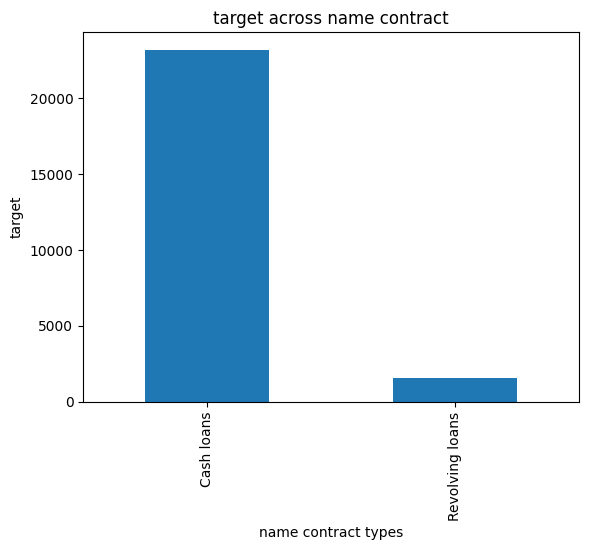

In [ ]:
target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE',]).sum()['TARGET']
target_nameContract.plot(kind='bar')
plt.xlabel('name contract types')
plt.ylabel('target')
plt.title('target across name contract')

<ipython-input-52-dec8e61a1c33>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).sum()['TARGET']


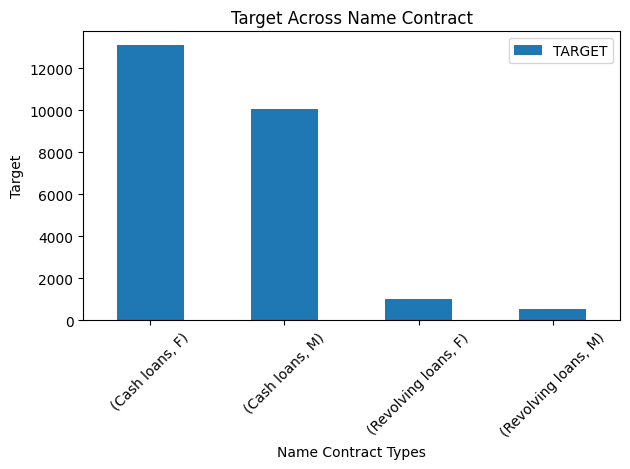

In [ ]:
import matplotlib.pyplot as plt

target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).sum()['TARGET']
target_nameContract.plot(kind='bar')

plt.xlabel('Name Contract Types')
plt.ylabel('Target')
plt.title('Target Across Name Contract')

plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca
plt.legend()  # Menampilkan legenda

plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()


In [ ]:
# # Visualization of the Category column across Reviews
# y = df_train['TARGET']
# x = df_train['NAME_INCOME_TYPE']

# plt.scatter(x, y)
# plt.xlabel('Target')
# plt.ylabel('Name Income types')
# plt.title('Name income type across target')

In [ ]:
# sns.heatmap(df_train.corr(), annot=True)
# df_train.value_counts()

<ipython-input-55-a30e3f141c9a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE']].corr()


<Axes: >

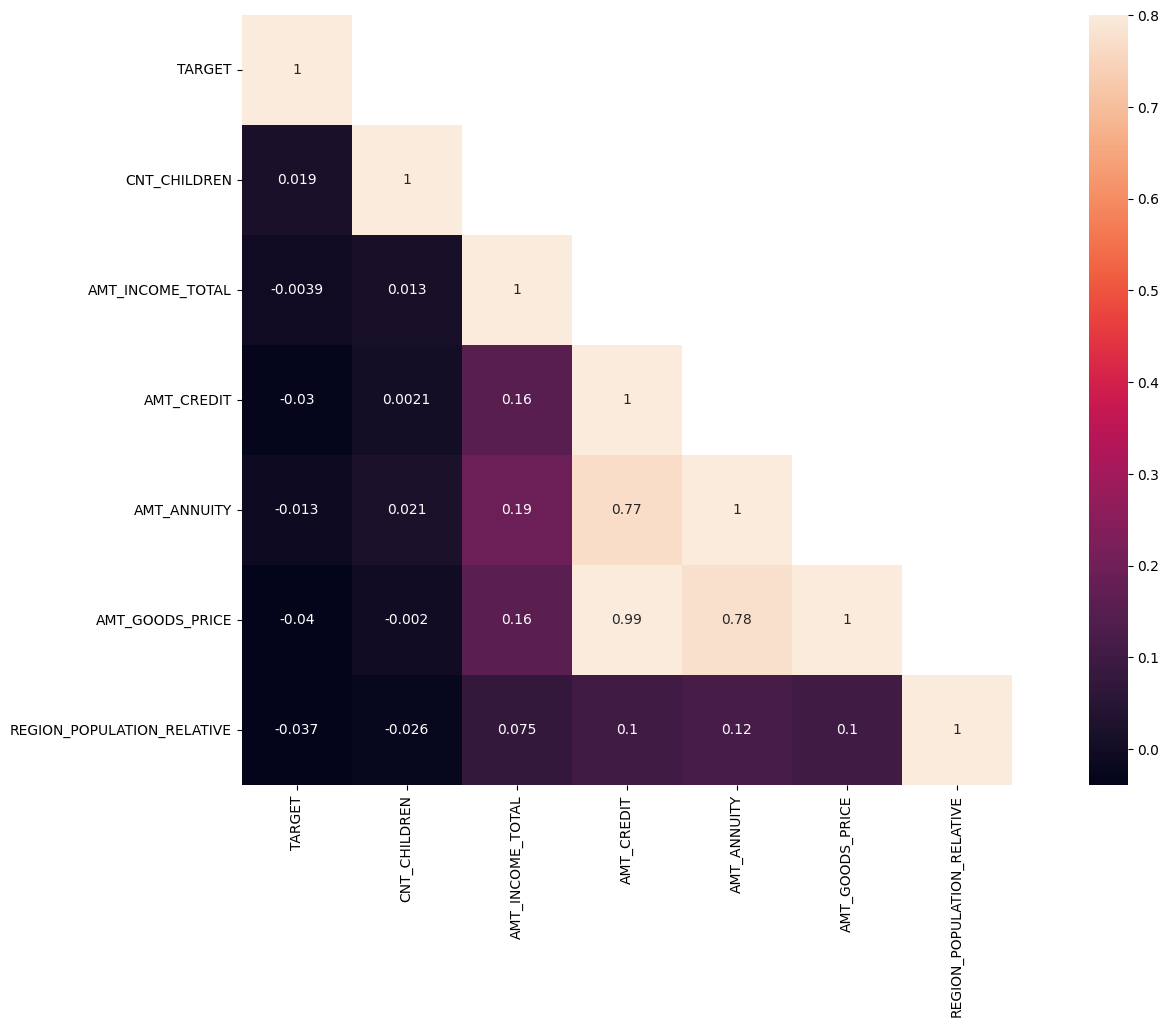

In [ ]:
# df.head()
corrMatt = df_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)


# ===================================================================

# Modelling MACHINE LEARNING

pakai model classifier, karna target nya adalah 1 dan 0

## Feature Selection

In [ ]:
# Convert all negative to positive values

df_train.iloc[:,17:20] = df_train.iloc[:,17:20].abs()
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].abs()


In [ ]:
df_col = df_train.columns
df_col = list(df_col)
flag_cols = intg_columns[21:]

col_remove = obj_columns+ flag_cols + ['SK_ID_CURR', 'TARGET']

for x in col_remove:
    while x in df_col:
        df_col.remove(x)
        

In [ ]:
# print(len(df_col)) #                187
# print(len(df_train.columns)) #      202

X = df_train[df_col]
y = df_train['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)     # GAK PAKE SCALED !!!!!!!
X_test = scaler.transform(X_test)

### Select Feature Selection

In [ ]:
# INI BISA DIBUAT VISUALISASI LOH

from sklearn.feature_selection import SelectKBest, chi2

selected_feature = SelectKBest(score_func=chi2, k=20)
selected_feature.fit(X_train, y_train)
scores = pd.DataFrame(selected_feature.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns= ['Features', 'Scores']
feature_scores= feature_scores.sort_values(by=['Scores'], ascending=False)
feature_scores

,Features,Scores
88,Higher education,5.279599e+02
24,REG_CITY_NOT_WORK_CITY,4.621888e+02
26,EXT_SOURCE_2,4.553688e+02
68,M,4.113281e+02
82,Pensioner,4.026878e+02
...,...,...
139,Transport: type 2,5.792038e-03
151,Security,5.172009e-03
1,AMT_INCOME_TOTAL,2.704174e-03
13,FLAG_CONT_MOBILE,1.037836e-04


In [ ]:
# kolom_feature = list(feature_scores.Features.unique())
# kolom_feature[-35:]
# # print('=========================================\n')
# # feature_scores.tail(35)

In [ ]:
# # obj_columns1 = ['a','h','s','t','a','p']
# # kolom_objek1 = ['a', 't','r','t','p','q','g']
# # obj_columns, kolom_objek = kolom_objek, obj_columns            UNTUK MASTIKAN ADA KESAMAAN ATAU ENGGAK

# # Menggunakan metode intersection() untuk mendapatkan nilai yang sama
# common_values = set(obj_columns).intersection(kolom_objek)

# # Cek apakah ada nilai yang sama antara list1 dan list2
# if common_values:
#     print("Ada nilai yang sama di kedua list:", common_values)
# else:
#     print("Tidak ada nilai yang sama di kedua list obj_columns dan feature_scores.")


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred_lr = lr.predict(X_test)

In [ ]:
lr_train_score = lr.score(X_train, y_train)
print('Logistic Regression train score:', lr_train_score)

Logistic Regression train score: 0.9195521343596921


In [ ]:
lr_test_score = lr.score(X_test, y_test)
print('Logistic Regression test score:', lr_test_score)

Logistic Regression test score: 0.918184292167855


## KNeighbors

In [ ]:
# from sklearn import neighbors

# kn = neighbors.KNeighborsClassifier(n_neighbors=7)
# kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# ypred_kn = kn.predict(X_test)

In [ ]:
# kn_train_score = kn.score(X_train, y_train)
# print('KNeighbors train score:', kn_train_score)

KNeighbors train score: 0.920233263354327


In [ ]:
# kn_test_score = kn.score(X_test, y_test)
# print('KNeighbros test score:', kn_test_score)

KNeighbros test score: 0.9166820878462962


## Decision Tree

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=48, min_samples_leaf=5,
                                 class_weight='balanced', #splitter='random',
                                 min_samples_split=117)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=48,
                       min_samples_leaf=5, min_samples_split=117)

In [ ]:
ypred_dt = dt.predict(X_test)

In [ ]:
dt_train_score = dt.score(X_train, y_train)
print('Decision tree train score:', dt_train_score)

Decision tree train score: 0.7352134359692092


In [ ]:
dt_test_score = dt.score(X_test, y_test)
print('Decision tree test score:' , dt_test_score)

Decision tree test score: 0.671703042508028


In [ ]:
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Hitung nilai AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print("Nilai AUC:", auc_score)

Nilai AUC: 0.6290075185869713


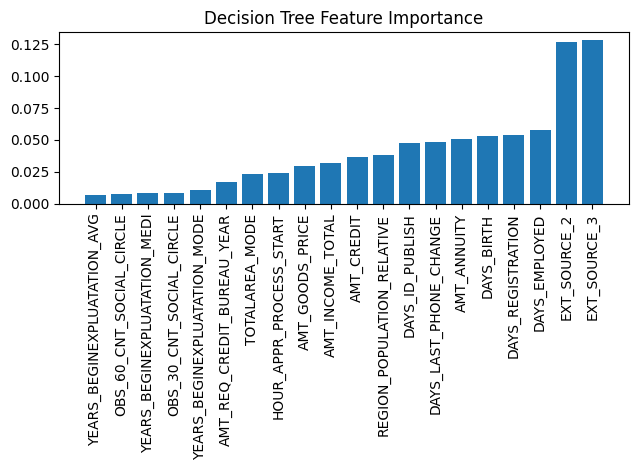

In [ ]:
importances = dt.feature_importances_
features = X.columns

indices = np.argsort(importances)[167:]

plt.title("Decision Tree Feature Importance")

plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), features[indices], rotation='vertical', )
plt.plot(kind='barh')
plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
#     # n_estimators=500, max_depth=15,
#     #                         max_samples=15, min_samples_split=15,
#     #                         max_features=50)
# rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [ ]:
# ypred_rf = rf.predict(X_test)

In [ ]:
# rf_train_score= rf.score(X_train, y_train)
# print('Random forest train score:', rf_train_score)

Random forest train score: 0.9194961511546536


In [ ]:
# rf_test_score= rf.score(X_test, y_test)
# print('Random forest test score:', rf_test_score)

Random forest test score: 0.9183693463234094


In [ ]:
# auc = met.roc_auc_score(y_test, ypred_rf)
# auc

0.5

## Gradient Boosting

In [ ]:
# # from sklearn.ensemble import GradientBoostingClassifier

# # gb = GradientBoostingClassifier(n_estimators=200, max_depth=7,
# #                                 learning_rate=0.01, ccp_alpha=0.1)  #ccp alpha HAPUS aja ntar
# # gb.fit(X_train, y_train)

# from sklearn.ensemble import AdaBoostClassifier

# ab = AdaBoostClassifier(n_estimators=100, random_state=100, 
#                         learning_rate=50)
# ab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=50, n_estimators=100, random_state=100)

In [ ]:
# # ypred_gb = gb.predict(X_test)
# ypred_ab = ab.predict(X_test)

In [ ]:
# # gb_train_score= gb.score(X_train, y_train)
# # print('gradient boositng train score:', gb_train_score)

# ab_train_score= ab.score(X_train, y_train)
# print('Ada boositng train score:', ab_train_score)

Ada boositng train score: 0.9194961511546536


In [ ]:
# # gb_test_score= gb.score(X_test, y_test)
# # print('gradient boositng test score:', gb_test_score)

# ab_test_score= ab.score(X_test, y_test)
# print('Ada boositng test score:', ab_test_score)

Ada boositng test score: 0.9183693463234094


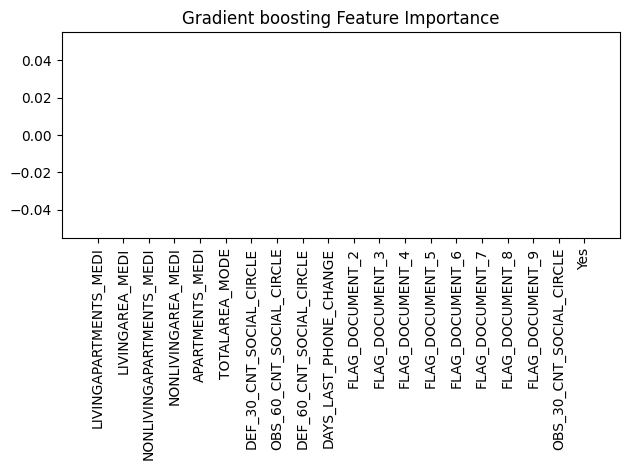

In [ ]:
# importances = gb.feature_importances_
# features = X.columns

# indices = np.argsort(importances)[215:]

# # plt.figure(figsize=(7, 5))
# plt.title("Gradient boosting Feature Importance")

# plt.bar(range(len(indices)), importances[indices])
# plt.xticks(range(len(indices)), features[indices],rotation='vertical')
# plt.tight_layout()
# plt.show()



# ===================================================================

# Model Evaluation

## Confusion Matrix

In [ ]:
# Confusion Matrix Logistic Regression

cm_lr = confusion_matrix(y_test, ypred_lr)
cm_lr

array([[84287,    79],
       [ 7436,    63]])

In [ ]:
# # Confusion Matrix KNeighbors

# cm_kn = confusion_matrix(y_test, ypred_kn)
# cm_kn

array([[84169,   197],
       [ 7450,    49]])

In [ ]:
# Confusion Matrix Decision tree

cm_dt = confusion_matrix(y_test, ypred_dt)
cm_dt

array([[79639,  4727],
       [ 6541,   958]])

In [ ]:
# # Confusion Matrix Gradient boosting

# cm_gb = confusion_matrix(y_test, ypred_gb)
# cm_gb

array([[84366,     0],
       [ 7499,     0]])

## Recall

In [ ]:
# RECALL

recall_lr = cm_lr[0][0]/ (cm_lr[0][0] + cm_lr[0][1])
# recall_kn = cm_kn[0][0]/ (cm_kn[0][0] + cm_kn[0][1])
recall_dt = cm_dt[0][0]/ (cm_dt[0][0] + cm_dt[0][1])
# recall_gb = cm_gb[0][0]/ (cm_gb[0][0] + cm_gb[0][1])

print('recall logistic regression model:', recall_lr)
# print('recall KNeighbors model:',recall_kn)
print('recall Decision tree model:', recall_dt)
# print('recall Gradient boosting model:', recall_gb)

recall logistic regression model: 0.9990636038214447
recall KNeighbors model: 0.9976649361117038
recall Decision tree model: 0.9439703197970747
recall Gradient boosting model: 1.0


## Precision

In [ ]:
# PRECISION

presisi_lr = cm_lr[0][0] / (cm_lr[0][0] + cm_lr[1][0])
# presisi_kn = cm_kn[0][0] / (cm_kn[0][0] + cm_kn[1][0])
presisi_dt = cm_dt[0][0] / (cm_dt[0][0] + cm_dt[1][0])
# presisi_gb = cm_gb[0][0] / (cm_gb[0][0] + cm_gb[1][0])

print('Precision logisitc regression model:', presisi_lr)
# print('Precision KNeighbors model:', presisi_kn)
print('Precision Decision tree model:', presisi_dt)
# print('Precision Gradient boosting model:', presisi_gb)

Precision logisitc regression model: 0.9189298213098133
Precision KNeighbors model: 0.918684988921512
Precision Decision tree model: 0.9241007194244605
Precision Gradient boosting model: 0.9183693463234094


## AUC Score

In [ ]:
ypred_list = [ypred_lr, ypred_dt,]

for i in ypred_list:
  auc = met.roc_auc_score(y_test, i)
  print(f'auc score of {i} = {auc}')

# auc = met.roc_auc_score(y_test, ypred_dt)
# auc

auc score of [0 0 0 ... 0 0 0] = 0.503732361985399
auc score of [0 0 0 ... 0 0 0] = 0.5020995703361559
auc score of [0 1 0 ... 0 0 0] = 0.5358603432563185
auc score of [0 0 0 ... 0 0 0] = 0.5


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Definisikan model
# print('Model yg dipakai adalah RANDOM FOREST')
# model = RandomForestClassifier()

# # Definisikan hyperparameter yang ingin diuji
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10]
# }

# # Buat objek GridSearchCV
# grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)

# # Latih model dengan Grid Search
# grid_search.fit(X_train, y_train)

# # Cetak hyperparameter terbaik yang ditemukan
# print("Hyperparameter Terbaik: ", grid_search.best_params_)
# print('='*90)

# # Prediksi pada set pengujian
# y_pred = grid_search.predict(X_test)

# # Hitung AUC
# auc = roc_auc_score(y_test, y_pred)
# print("Nilai AUC: ", auc)


Model yg dipakai adalah RANDOM FOREST
Hyperparameter Terbaik:  {'max_depth': 10, 'n_estimators': 300}
Nilai AUC:  0.5


### Visualization of Model Evaluation

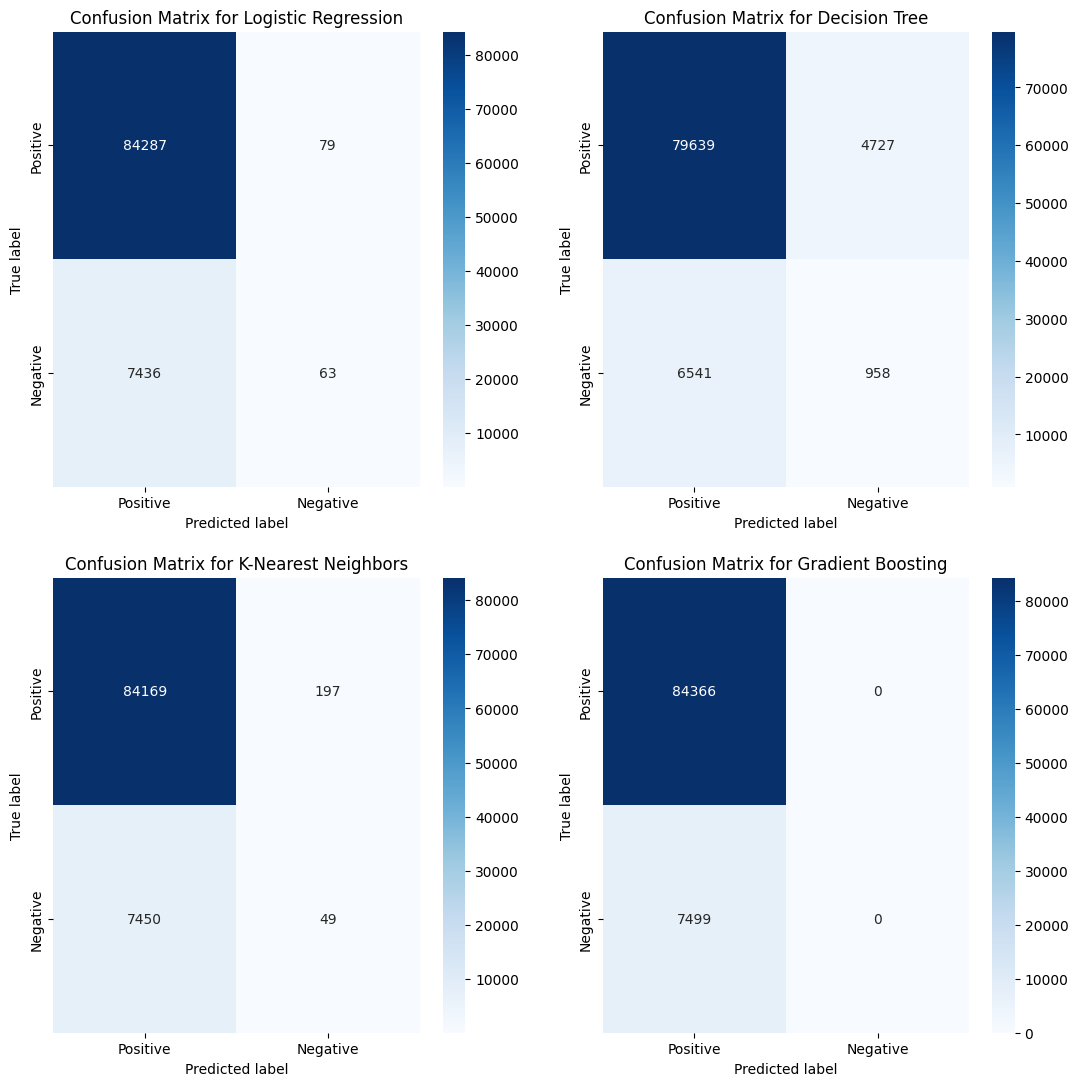

In [ ]:
# class_names = ['Positive', 'Negative']

# # Compute confusion matrices
# cm_dt = confusion_matrix(y_test, ypred_dt)
# # cm_knn = confusion_matrix(y_test, ypred_kn)
# # cm_gb = confusion_matrix(y_test, ypred_gb)
# cm_lr = confusion_matrix(y_test, ypred_lr)

# # Plot confusion matrices
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))

# sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt='d', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 0])
# axes[0, 0].set_title('Confusion Matrix for Logistic Regression')

# sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt='d', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 1])
# axes[0, 1].set_title('Confusion Matrix for Decision Tree')

# sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt='d', xticklabels=class_names, yticklabels=class_names, ax=axes[1,0])
# axes[1, 0].set_title('Confusion Matrix for K-Nearest Neighbors')

# sns.heatmap(cm_gb, annot=True, cmap="Blues", fmt='d', xticklabels=class_names, yticklabels=class_names, ax=axes[1, 1])
# axes[1, 1].set_title('Confusion Matrix for Gradient Boosting')

# for ax in axes.flat:
#     ax.set(ylabel='True label', xlabel='Predicted label')

# plt.show()

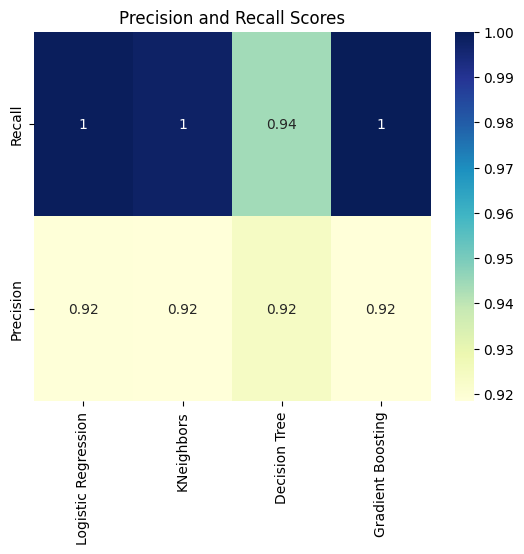

In [ ]:
models = ['Logistic Regression', 'KNeighbors', 'Decision Tree', 'Gradient Boosting']
recall_scores = [recall_lr, recall_kn, recall_dt, recall_gb]
precision_scores = [presisi_lr, presisi_kn, presisi_dt, presisi_gb]

# Create a numpy array of the precision and recall scores
scores = np.array([recall_scores, precision_scores])

# Create a heatmap of the precision and recall scores
ax = sns.heatmap(scores, annot=True, cmap='YlGnBu', xticklabels=models, yticklabels=['Recall', 'Precision'])

# Set the title
ax.set_title('Precision and Recall Scores')

plt.show()

KESIMPULAN TEKNIS:
- model yg paling bagus adalah gradient boosting, karna dia adalah metode ensemble, yg mana metode ensemble adalah the ensemble
learning method that is commonly used to reduce variance within a
noisy dataset

### Recursive Feature Elimination (RFE) 

In [ ]:
import sklearn.feature_selection as fs
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X_train, y_train)

lr_rfe_Support = rfe.support_
lr_rfe_Ranking = rfe.ranking_

print('Support:', lr_rfe_Support)
print('Ranking:', lr_rfe_Ranking)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Support: [False False  True False  True False False  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False

In [ ]:
list_lr_rfe_Support= list(lr_rfe_Support)
# kolom_5_inListLR = list_lr_rfe_Ranking ==5
num = True #input('angka dalam list = ')


target_list= list_lr_rfe_Support 
indices = []


# Loop untuk mencari indeks di mana angka 5 muncul
for i in range(len(target_list)):
    if target_list[i] == num:
        indices.append(i)

# Cetak hasil
if indices:
    index_str = " ".join(str(index) for index in indices)
    index_str = str(index_str)
    print(f"Angka {num} ditemukan pada indeks: {index_str}")
else:
    print(f"Angka {num} tidak ditemukan dalam list")
    # print(type(index_str))
print(indices)
print('='*82)
print('\ntable sesuai indices:\n') 
dfcol =df_train.columns[indices]
df_train[dfcol]

Angka True ditemukan pada indeks: 2 4 7 12 74
[2, 4, 7, 12, 74]

table sesuai indices:



,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,YEARS_BEGINEXPLUATATION_MEDI
0,Cash loans,N,202500.0,Working,0.972200
1,Cash loans,N,270000.0,State servant,0.985100
2,Revolving loans,Y,67500.0,Working,0.977746
3,Cash loans,N,135000.0,Working,0.977746
4,Cash loans,N,121500.0,Working,0.977746
...,...,...,...,...,...
307506,Cash loans,N,157500.0,Working,0.987600
307507,Cash loans,N,72000.0,Pensioner,0.972700
307508,Cash loans,N,153000.0,Working,0.981600
307509,Cash loans,N,171000.0,Commercial associate,0.977100


### Decision tree Evaluation

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
# X, y = load_iris(return_X_y=True)
print('X train shape:',X_train.shape)
print('='*80)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
print('Feature Importances:\n',clf.feature_importances_)
print('='*80)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print('X new shape:',X_new.shape)


X train shape: (214350, 235)
Feature Importances:
 [1.09758998e-02 1.78807351e-02 1.75393589e-02 1.72995535e-02
 1.70749555e-02 1.75638071e-02 1.99167057e-02 1.58418019e-02
 1.81595499e-02 1.89818245e-02 1.26194453e-02 0.00000000e+00
 1.14262250e-03 8.05002927e-03 3.66729043e-04 8.79015657e-03
 4.29552914e-03 1.20907434e-02 6.83951602e-03 6.76281432e-03
 1.76328450e-02 1.42374616e-03 3.03399111e-03 2.69294026e-03
 4.45207101e-03 5.11948597e-03 5.24096457e-03 1.68567120e-02
 3.23703404e-02 3.08384641e-02 5.25913088e-03 4.79789068e-03
 6.07284778e-03 4.52760271e-03 4.31201402e-03 3.87458249e-03
 5.19900245e-03 4.65922478e-03 4.03869466e-03 5.08003527e-03
 4.19553713e-03 5.55790750e-03 3.81952892e-03 4.91666096e-03
 5.24510309e-03 4.81925224e-03 6.08031069e-03 4.55568490e-03
 4.22714841e-03 3.75416055e-03 5.16375476e-03 4.56990695e-03
 3.87691027e-03 5.10566562e-03 4.16263005e-03 5.59274421e-03
 3.75900977e-03 4.74540651e-03 5.12936358e-03 4.85332123e-03
 5.98092251e-03 4.55831141e-03 4.2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


X new shape: (306215, 87)


In [ ]:
lis = []
for i in range(1,30,2):
    clf = tree.DecisionTreeClassifier(max_depth=i, min_samples_split=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_test = clf.score(X_test, y_test)
    acc_train = clf.score(X_train, y_train)
    cm = confusion_matrix(y_test, y_pred)
    recall = cm[0][0]/ (cm[0][0] + cm[0][1])
    presisi = cm[0][0] / (cm[0][0] + cm[1][0])
    lis.append([i, 
                'train score',acc_train,'test score:',acc_test,
                'recall: ',recall, 'precision:',presisi,'===================='])
    
lis